<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

# quick overview of the data
boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [2]:
# Exploratory data analysis (EDA) - 1.

# Concatenate y and x
df_boston = pd.concat([y,X], axis=1)
# Study the first 5 rows 
df_boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# EDA - 2
# Total nulls
df_boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [4]:
# EDA - 3
# shape
df_boston.shape

(506, 14)

In [5]:
# EDA - 4
df_boston.dtypes


MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [6]:
# EDA - 5
# summary statistics
df_boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
# EDA - 6
# number of unique values for each column
df_boston.nunique()

MEDV       229
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

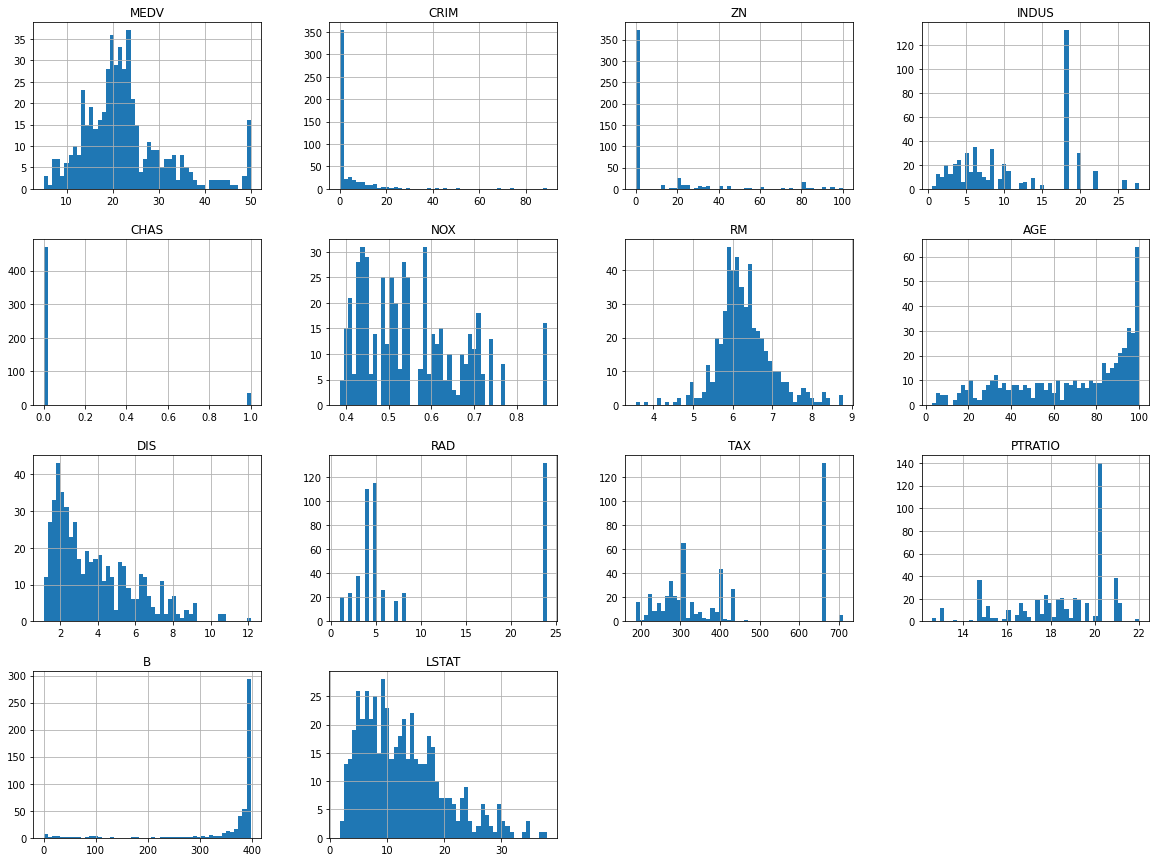

In [8]:
# EDA - 7
# visualize the distribution of the attribute values using histogram
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df_boston.hist(bins=50, figsize=(20,15))
plt.show()

/Users/jean/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


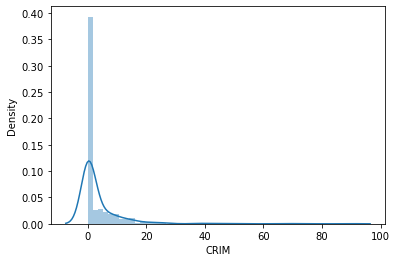

In [9]:
# EDA - 7.1 - further look into crime attribute
# explore the distribution of CRIME
sns.distplot(df_boston['CRIM'])
plt.show()

<Figure size 432x288 with 0 Axes>

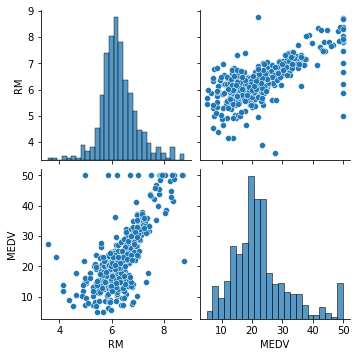

In [10]:
# EDA - 8
# Relationship between number of room and median price
plt.figure()

sns.pairplot(df_boston[['RM', 'MEDV']])
plt.show()

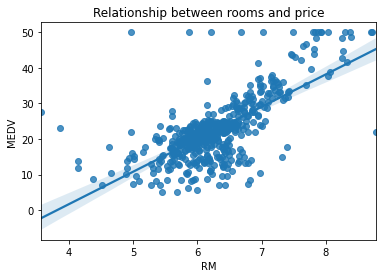

In [11]:
# EDA - 8.1
# Relationship between number of room and median price
# using seaborn regplot

sns.regplot(x='RM', y='MEDV', data=df_boston, fit_reg=True)
plt.title("Relationship between rooms and price")
plt.show()

<Figure size 432x288 with 0 Axes>

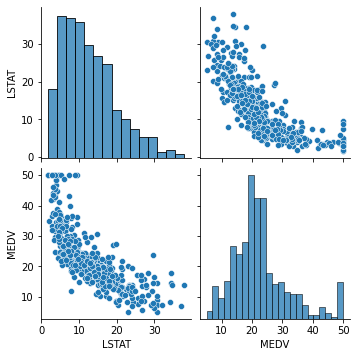

In [12]:
# EDA - 9
# Relationship between LSTAT and median price
plt.figure()

sns.pairplot(df_boston[['LSTAT', 'MEDV']])
plt.show()

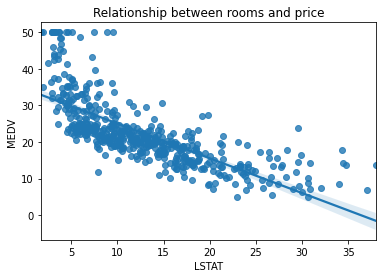

In [13]:
# EDA - 9.1
# Relationship between LSTAT and median price
# using seaborn regplot

sns.regplot(x='LSTAT', y='MEDV', data=df_boston, fit_reg=True)
plt.title("Relationship between rooms and price")
plt.show()

<AxesSubplot:>

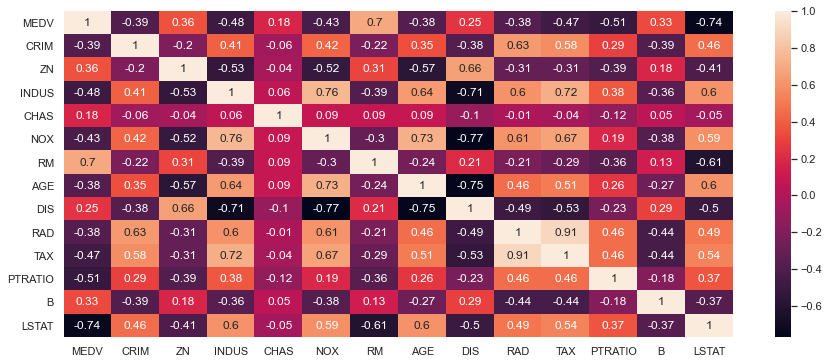

In [14]:
# standardize the figure size in all the figurres
sns.set(rc={'figure.figsize':(15,6)})

correlation_matrix = df_boston.corr().round(2)
# annot = True label the value
sns.heatmap(data=correlation_matrix, annot = True)

## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [15]:
# Feature selection
# create feature matix (x_selected)
# use np.c_ to select attributes/features/independent variables
# LSTAT, RM and PTRATIO and assign them as X，
# assign dependent variable MEDV as Y：

X = pd.DataFrame(np.c_[df_boston['LSTAT'], df_boston['RM'], df_boston['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
Y = df_boston.MEDV

In [16]:
# Import the class.
from sklearn.linear_model import LinearRegression

# Instantiate the model.
lr = LinearRegression()

# Train the model on the entire data set.
lr.fit(X, Y)

# Predict the response values for the observations in X ("test the model").
lr.predict(X)

# Store the predicted response
y_pred = lr.predict(X)

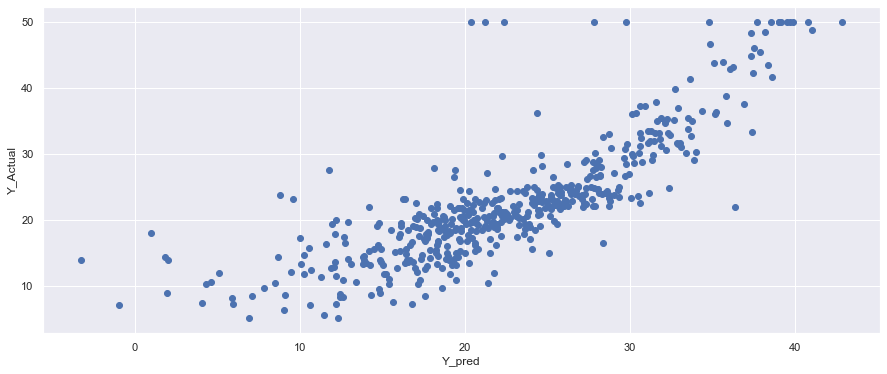

In [17]:
# plotting the actual Y vs predicted Y (y_pred)
plt.scatter(y_pred, Y)
plt.xlabel('Y_pred')
plt.ylabel('Y_Actual')
plt.show()

In [18]:
#Compute mean squared error using a function from metrics.
from sklearn import metrics

print(f"MSE: {metrics.mean_squared_error(Y, y_pred)}")

MSE: 27.130405758497066


### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

In [19]:
from sklearn.model_selection import train_test_split

# split the data into 70% training and 30% testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1, test_size=0.3)

In [20]:
# 70/30 train/test split
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 3)
(152, 3)
(354,)
(152,)


In [21]:
# Fitting linear model
lr.fit(X_train,Y_train)
# Predicting using the linear model
Y_pred = lr.predict(X_test)
# Actual values：Y_test
# Measure accuracy：
r2 = lr.score(X_test, Y_test).round(2)
print(f"{r2*100}% of the dependent median prices can be explained by the model.")

72.0% of the dependent median prices can be explained by the model.


In [22]:
# print first five predicted values
Y_pred[0:5]

array([27.78511639, 28.20483188, 18.52350809, 23.54617906, 19.24312332])

Text(0, 0.5, 'Predicted Values')

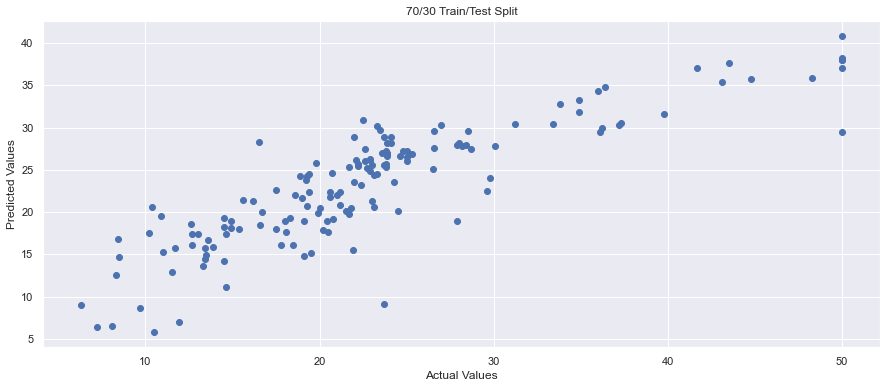

In [23]:
## The line / model
plt.scatter(Y_test, Y_pred)
plt.title("70/30 Train/Test Split")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [24]:
# 90/10 train/test split

from sklearn.model_selection import train_test_split

# split the data into 70% training and 30% testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1, test_size=0.1)

In [25]:
### 90 / 10 Train/Test Split

In [26]:
# 90/10 train/test split
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(455, 3)
(51, 3)
(455,)
(51,)


In [27]:

# Fitting linear model
lr.fit(X_train,Y_train)
# Predicting using the linear model
Y_pred = lr.predict(X_test)
# Actual values：Y_test
# Measure accuracy：
r2 = lr.score(X_test, Y_test).round(2)
print(f"{r2*100}% of the dependent median prices can be explained by the model.")

75.0% of the dependent median prices can be explained by the model.


In [28]:
# print first five predicted values
Y_pred[0:5]

array([28.00058091, 28.27459166, 18.44546226, 23.07518304, 18.48817332])

Text(0, 0.5, 'Predicted Values')

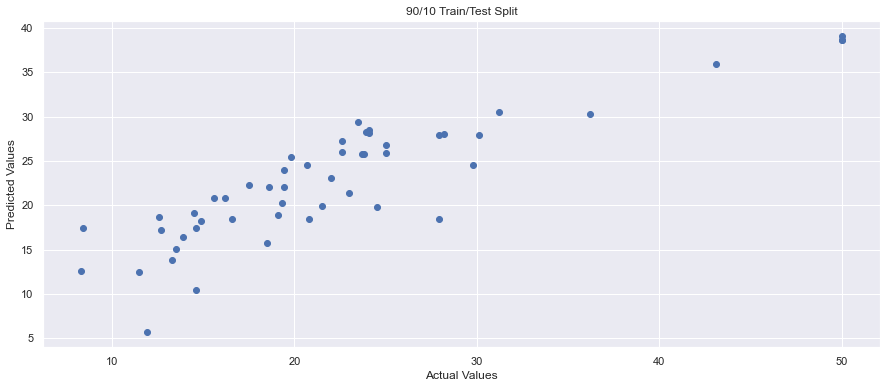

In [29]:
## The line / model
plt.scatter(Y_test, Y_pred)
plt.title("90/10 Train/Test Split")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [30]:
print("Based on the scatter plot of predicted vs. actual values of both 70/30 and 90/10\
train/test split, there does not seem to have significant differences in the accuracy\
 of the model,\
         although it is observed that the 90/10 split has a slightly\
 higher accuracy score (3%) than\
  the 70/30 split.")

Based on the scatter plot of predicted vs. actual values of both 70/30 and 90/10train/test split, there does not seem to have significant differences in the accuracy of the model,         although it is observed that the 90/10 split has a slightly higher accuracy score (3%) than  the 70/30 split.


## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [31]:
# 5 Folds - import class, define split, return the number of splitting iterations

from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(df_boston) # returns the number of splitting iterations in the cross-validator
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [32]:
# 5 Folds - get the train_index and test_index of the splitted data

for train_index, test_index in kf.split(df_boston):
 print("Train:", train_index, "Test:", test_index)

Train: [102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 342 343 344 345 346

In [33]:
# 5 Folds - create function to get the score

def get_score(lr, X_train, X_test, Y_train, Y_test):
    lr.fit(X_train, Y_train)
    return lr.score(X_test, Y_test)

In [34]:
# 5 Folds - get a list of the score

score_5folds = []

for train_index, test_index in kf.split(df_boston):
    X_train, X_test, Y_train, Y_test = boston.data[train_index], boston.data[test_index], \
                                        boston.target[train_index], boston.target[test_index]
    score_5folds.append(get_score(lr, X_train, X_test, Y_train, Y_test))

In [35]:
# 5 Folds -print the list of scores
score_5folds

[0.6391999371396757,
 0.7138669803833291,
 0.5870234363057776,
 0.07923080540508531,
 -0.25294153725444746]

In [36]:
# 5 Folds - get the average scores

ave_score_5folds = sum(score_5folds) / len(score_5folds)
ave_score_5folds

0.353275924395884

In [37]:
# 6 Folds -- note step same as for 5 folds

from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=6) # Define the split - into 5 folds 
kf.get_n_splits(df_boston) # returns the number of splitting iterations in the cross-validator
kf

KFold(n_splits=6, random_state=None, shuffle=False)

In [38]:
for train_index, test_index in kf.split(df_boston):
 print("Train:", train_index, "Test:", test_index)

Train: [ 85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300
 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 327 328 329

In [39]:
score_6folds = []

for train_index, test_index in kf.split(df_boston):
    X_train, X_test, Y_train, Y_test = boston.data[train_index], boston.data[test_index], \
                                        boston.target[train_index], boston.target[test_index]
    score_6folds.append(get_score(lr, X_train, X_test, Y_train, Y_test))

In [40]:
score_6folds

[0.6428683491049726,
 0.6124551981166053,
 0.5149879693763675,
 0.7852951287316421,
 -0.1469628502735516,
 -0.007476866372924995]

In [41]:
ave_score_6folds = sum(score_6folds) / len(score_6folds)
ave_score_6folds

0.4001944881138518

In [42]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=7) # Define the split - into 7 folds 
kf.get_n_splits(df_boston) # returns the number of splitting iterations in the cross-validator
kf

KFold(n_splits=7, random_state=None, shuffle=False)

In [43]:
for train_index, test_index in kf.split(df_boston):
 print("Train:", train_index, "Test:", test_index)

Train: [ 73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317

In [44]:
score_7folds = []

for train_index, test_index in kf.split(df_boston):
    X_train, X_test, Y_train, Y_test = boston.data[train_index], boston.data[test_index], \
                                        boston.target[train_index], boston.target[test_index]
    score_7folds.append(get_score(lr, X_train, X_test, Y_train, Y_test))

In [45]:
score_7folds

[0.653444604895278,
 0.5963168502376432,
 0.6786538162947879,
 0.6119339319097841,
 0.5194051406277125,
 -0.305776868143121,
 0.4001834971733328]

In [46]:
ave_score_7folds = sum(score_7folds) / len(score_7folds)
ave_score_7folds

0.4505944247136311

In [47]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=8) # Define the split - into 8 folds 
kf.get_n_splits(boston) # returns the number of splitting iterations in the cross-validator
kf

KFold(n_splits=8, random_state=None, shuffle=False)

In [48]:
for train_index, test_index in kf.split(df_boston):
 print("Train:", train_index, "Test:", test_index)

Train: [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308

In [49]:
score_8folds =[]
for train_index, test_index in kf.split(df_boston):
    X_train, X_test, Y_train, Y_test = boston.data[train_index], boston.data[test_index], \
                                        boston.target[train_index], boston.target[test_index]
    score_8folds.append(get_score(lr, X_train, X_test, Y_train, Y_test))

In [50]:
score_8folds

[0.7505488918874834,
 0.42115868129561984,
 0.718886599786021,
 0.5723991021786007,
 0.7567942659894084,
 -0.3729302803512695,
 -0.35196626076258575,
 0.3379814215103415]

In [51]:
ave_score_8folds = sum(score_8folds) / len(score_8folds)
ave_score_8folds

0.35410905269170245

In [52]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=9) # Define the split - into 9 folds 
kf.get_n_splits(boston) # returns the number of splitting iterations in the cross-validator
kf

KFold(n_splits=9, random_state=None, shuffle=False)

In [53]:
for train_index, test_index in kf.split(df_boston):
 print("Train:", train_index, "Test:", test_index)

Train: [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 300 301

In [54]:
score_9folds = []
for train_index, test_index in kf.split(df_boston):
    X_train, X_test, Y_train, Y_test = boston.data[train_index], boston.data[test_index], \
                                        boston.target[train_index], boston.target[test_index]
    score_9folds.append(get_score(lr, X_train, X_test, Y_train, Y_test))

In [55]:
score_9folds

[0.7418322380764926,
 0.4783469070104406,
 0.57877310408525,
 0.5807374631410088,
 0.6496315543062245,
 0.7084460476346873,
 -0.14025458430177573,
 -0.541671876129014,
 0.3756516696062223]

In [56]:
ave_score_9folds = sum(score_9folds) / len(score_9folds)
ave_score_9folds

0.3812769470477263

In [57]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=10) # Define the split - into 10 folds 
kf.get_n_splits(boston) # returns the number of splitting iterations in the cross-validator
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [58]:
for train_index, test_index in kf.split(df_boston):
 print("Train:", train_index, "Test:", test_index)

Train: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295

In [59]:
score_10folds = []
for train_index, test_index in kf.split(df_boston):
    X_train, X_test, Y_train, Y_test = boston.data[train_index], boston.data[test_index], \
                                        boston.target[train_index], boston.target[test_index]
    score_10folds.append(get_score(lr, X_train, X_test, Y_train, Y_test))

In [60]:
score_10folds

[0.7337608193502223,
 0.4730725033143336,
 -1.0063145437265009,
 0.6411398421934955,
 0.5476604617627915,
 0.7364029190694037,
 0.37828386352480203,
 -0.1292270320887725,
 -0.7684324314385111,
 0.4189434986442667]

In [61]:
ave_score_10folds = sum(score_10folds) / len(score_10folds)
ave_score_10folds

0.20252899006055305

In [62]:
# study the average scores

ls_avgscores = [ave_score_5folds, ave_score_6folds, ave_score_7folds, ave_score_8folds,\
               ave_score_9folds, ave_score_10folds]
ls_avgscores

[0.353275924395884,
 0.4001944881138518,
 0.4505944247136311,
 0.35410905269170245,
 0.3812769470477263,
 0.20252899006055305]

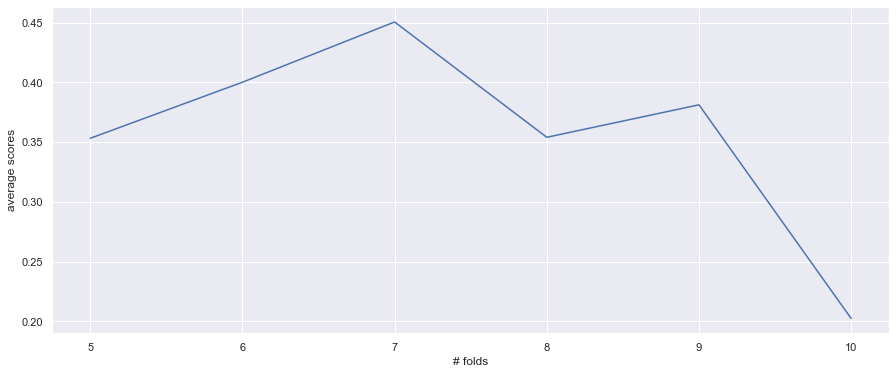

In [63]:
# visualize the average score for comparison

x = [5,6,7,8,9,10]
y = ls_avgscores

plt.plot(x,y)
plt.xlabel('# folds')
plt.ylabel('average scores')
plt.show()

In [64]:
print("As seen from the graph above, the average scores increased as the number of folds increased from 5 to 7. However, \
the average scores dropped as the number of folds increased from 7 to 10.  It would appear\
thus that 7 folds are the most optimum number of folds for this dataset.")

As seen from the graph above, the average scores increased as the number of folds increased from 5 to 7. However, the average scores dropped as the number of folds increased from 7 to 10.  It would appearthus that 7 folds are the most optimum number of folds for this dataset.


## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [65]:
# First, format your data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1221.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                   1.38e-321
Time:                        16:39:08   Log-Likelihood:                         -1567.5
No. Observations:                 506   AIC:                                      3151.
Df Residuals:                     498   BIC:                                      3185.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

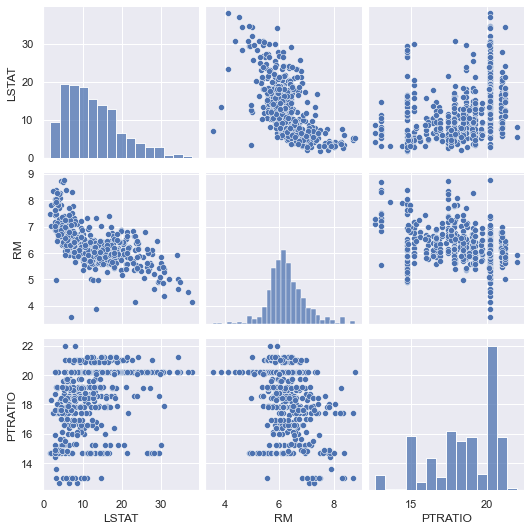

In [67]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [68]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

In [69]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

ValueError: Length of values (6) does not match length of index (506)

In [ ]:
from sklearn.model_selection import train_test_split  #Note: if you didn't import this earlier, you'll need to do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))